In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation

# Лабораторная работа №3 MATPLOTLIB 

1. Построить график функции 𝑦(𝑥) = 𝑥2 + 𝑥 + 1, 𝑥 = -4, … , 4, оформив его по 
аналогии с рис.1, т.е. добавив аннотации, обозначения осей 𝑂𝑥 и 𝑂𝑦, заголовок, 
содержащий формулу функции.

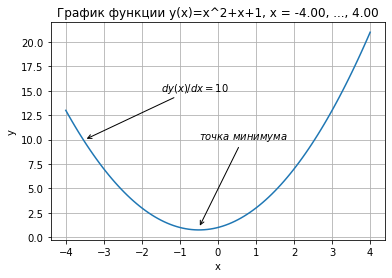

In [2]:
x = np.linspace(-4, 4, 100, endpoint=True)
y = lambda x: (x ** 2 + x + 1)


plt.grid()

plt.title("График функции y(x)=x^2+x+1, x = -4.00, ..., 4.00")
plt.xlabel("x")
plt.ylabel("y")

arrowprops = {
    'arrowstyle': '->',
}

plt.annotate(r'$точка \ минимума$', xy=(-0.5, 1), xytext=(-0.5, 10), arrowprops=arrowprops)
plt.annotate(r'$dy(x)/dx = 10$', xy=(-3.5, 10), xytext=(-1.5, 15), arrowprops=arrowprops)

plt.plot(x, y(x))

2. Построить график функции распределения простых чисел

In [3]:
primes = np.genfromtxt('data/primes1.txt', skip_header=2, dtype=int)

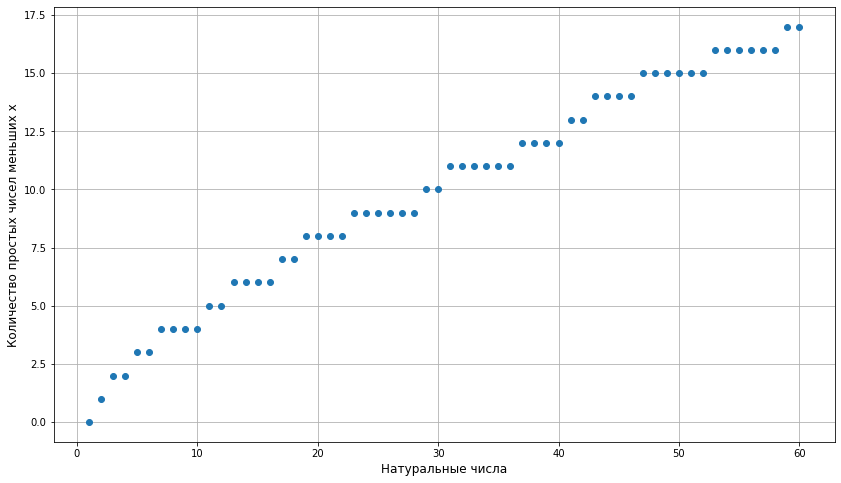

In [4]:
y = [primes[primes <= i].size for i in range(1, 61)]

plt.figure(figsize=(14, 8))
plt.grid()

plt.ylabel('Количество простых чисел меньших х', fontsize=12)
plt.xlabel('Натуральные числа', fontsize=12)

plt.step(range(1, 61), y, 'o')

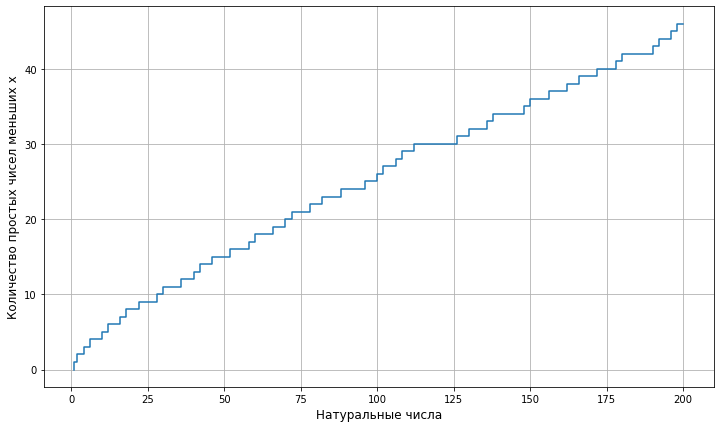

In [5]:
y = [primes[primes <= i].size for i in range(1, 201)]

plt.figure(figsize=(12, 7))
plt.grid()

plt.ylabel('Количество простых чисел меньших х', fontsize=12)
plt.xlabel('Натуральные числа', fontsize=12)

plt.step(range(1, 201), y)

3. Построить графики параметрических кривых эллипса и гиперболы.

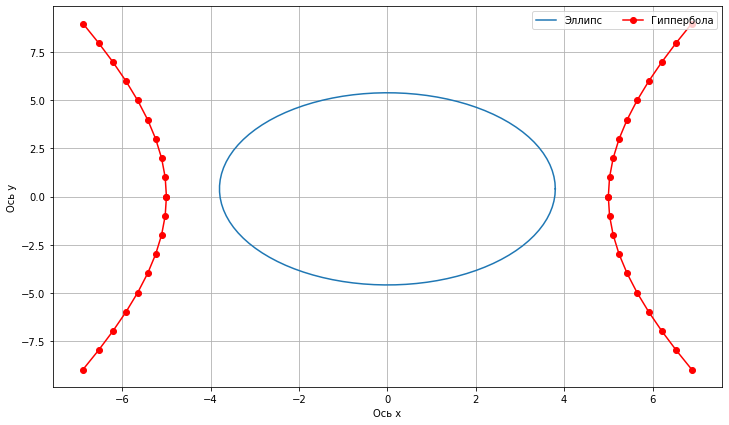

In [6]:
u=0.4
v=0.4
a=9.5
b=5
t = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(12, 7))
plt.grid()

plt.plot(u*a*np.cos(t), v+b*np.sin(t))
x = []
x2 = []
y = []
y2 = []

for i in range(10):
    x.append(-i)
    x2.append(i)
    y.append(np.sqrt(b**2 + (b**2 * (i**2 / a**2))))
    y2.append(-np.sqrt(b**2 + (b**2 * (i**2 / a**2))))
    
plt.plot(y, x, 'red', marker='o')
plt.plot(y2, x, 'red', marker='o')
plt.plot(y2, x2, 'red', marker='o')
plt.plot(y, x2, 'red', marker='o')

plt.ylabel('Ось y')
plt.xlabel('Ось х')
plt.legend(['Эллипс', 'Гиппербола'], loc='upper right', ncol=2)

plt.show()

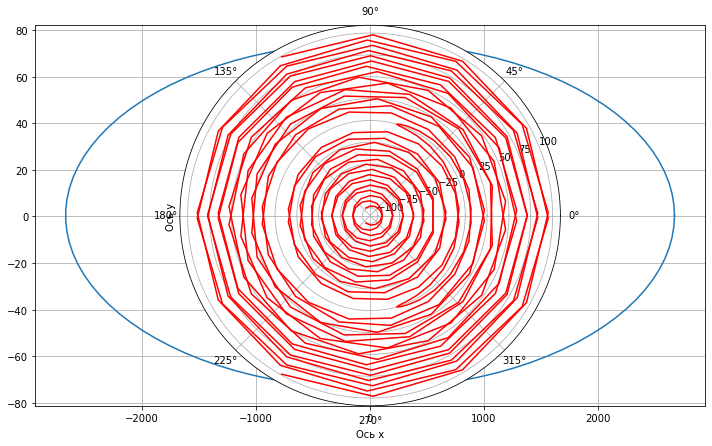

In [8]:
u=0.4
v=0.4
a=9.5
b=5
t = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(12, 7))
plt.grid()

plt.plot(u*np.cosh(a)*np.cos(t), v+np.cosh(b)*np.sin(t))
plt.axes(projection='polar')
x = []
x2 = []
y = []
y2 = []

for i in range(100):
    x.append(-i)
    x2.append(i)
    y.append(np.sqrt(b**2 + (b**2 * (i**2 / a**2))))
    y2.append(-np.sqrt(b**2 + (b**2 * (i**2 / a**2))))
    
plt.plot(y, x, 'red')
plt.plot(y2, x, 'red')
plt.plot(y2, x2, 'red')
plt.plot(y, x2, 'red')
plt.ylabel('Ось y')
plt.xlabel('Ось х')

plt.show()

4. Построить вектор, начинающийся в точке (0, 0; 0, 0). Реализуйте анимацию вращения вектора по и против часовой стрелки. Дополнительный указания см. в разделе 3.

<IPython.core.display.Javascript object>


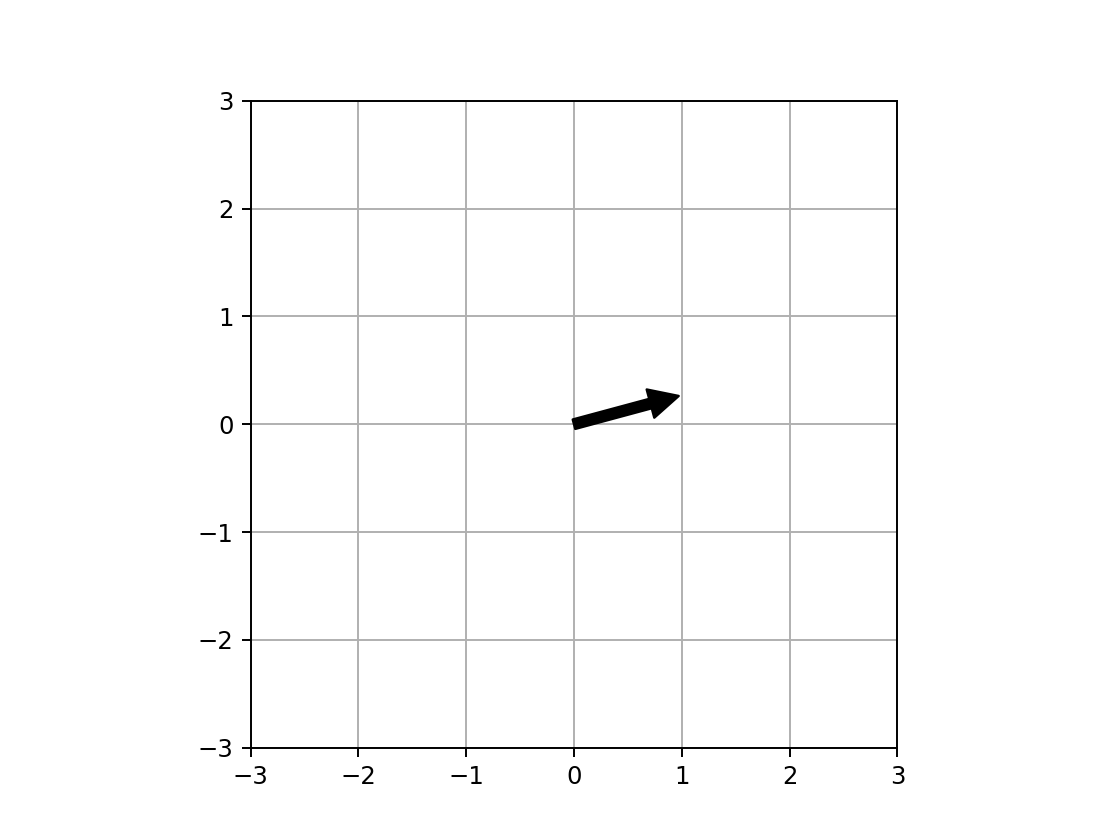

In [64]:
%matplotlib nbagg

fig, axes = plt.subplots()
plt.grid()

an3 = axes.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops={"facecolor": "black"})
face = mpatches.Circle((0, 0), radius=1, zorder=-1, color="white")

axes.add_patch(face)
axes.set_xlim(-3, 3)
axes.set_ylim(-3, 3)
axes.set_aspect("equal")

def animate(frame, direction=1):
    center = np.array(np.unravel_index(frame % 100, (10, 10))) / 1000
    face.set_center(center)
    frame *= 15
    s = np.deg2rad(frame)
    an3.xy = center + (np.sin(s) * direction, np.cos(s) * direction)
    return [an3, face]

# fargs=(1,) - по часовой, fargs=(-1,) - против
animation = FuncAnimation(fig, animate, fargs=(1,), frames=60, blit=True)

plt.show()